In [3]:
#unzip the dataset
!unzip '/content/drive/MyDrive/Flowers-Dataset'

unzip:  cannot find or open /content/drive/MyDrive/Flowers-Dataset, /content/drive/MyDrive/Flowers-Dataset.zip or /content/drive/MyDrive/Flowers-Dataset.ZIP.


Importing necessary packages

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

spliting data into training and testing

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,validation_split=0.2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
xtrain=train_datagen.flow_from_directory('/content/drive/MyDrive/Flowers-Dataset',target_size=(64,64),class_mode='categorical',batch_size=100,subset="training")

Found 100 images belonging to 1 classes.


In [11]:
xtest=train_datagen.flow_from_directory('/content/drive/MyDrive/Flowers-Dataset/flowers',target_size=(64,64),class_mode='categorical',batch_size=100,subset="validation")

Found 25 images belonging to 1 classes.


CNN Model Building

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [13]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
# Fully connected layers (ANN)
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(5,activation='softmax')) # Output layer

Compiling the model

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Training the model

In [15]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,
                    validation_data=xtest,
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 8.1259 - accuracy: 0.0000e+00 - val_loss: 28.0207 - val_accuracy: 0.8400
Epoch 2/10
1/1 [==============================] - 1s 733ms/step - loss: 28.7494 - accuracy: 0.8300 - val_loss: 38.6090 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 1s 736ms/step - loss: 40.3557 - accuracy: 0.0000e+00 - val_loss: 55.5106 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 1s 742ms/step - loss: 57.0039 - accuracy: 1.0000 - val_loss: 58.9590 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 1s 716ms/step - loss: 61.1802 - accuracy: 1.0000 - val_loss: 62.3546 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 1s 756ms/step - loss: 64.3197 - accuracy: 0.0000e+00 - val_loss: 70.5450 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 1s 716ms/step - loss: 73.2040 - accuracy: 0.0000e+00 - val_loss: 96.9926 - val

Save the model

In [16]:
model.save('Flower.h5')

Test the model

In [17]:
import numpy as np 
from tensorflow.keras.preprocessing import image

In [19]:
img=image.load_img('/content/drive/MyDrive/Flowers-Dataset/flowers/daisy/100080576_f52e8ee070_n.jpg',target_size=(64,64))

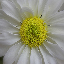

In [20]:
img

In [21]:
x=image.img_to_array(img)
x

array([[[141., 141., 139.],
        [149., 149., 149.],
        [152., 152., 154.],
        ...,
        [162., 161., 166.],
        [154., 154., 152.],
        [153., 153., 153.]],

       [[136., 135., 131.],
        [146., 145., 143.],
        [169., 168., 174.],
        ...,
        [159., 158., 163.],
        [155., 155., 153.],
        [149., 149., 149.]],

       [[125., 125., 117.],
        [138., 140., 137.],
        [152., 152., 152.],
        ...,
        [156., 156., 156.],
        [157., 157., 155.],
        [143., 142., 140.]],

       ...,

       [[ 41.,  44.,  23.],
        [ 43.,  46.,  25.],
        [ 49.,  51.,  37.],
        ...,
        [128., 124., 121.],
        [125., 121., 118.],
        [125., 122., 117.]],

       [[ 43.,  46.,  25.],
        [ 43.,  46.,  25.],
        [ 54.,  55.,  37.],
        ...,
        [130., 126., 125.],
        [129., 125., 124.],
        [127., 123., 122.]],

       [[ 44.,  47.,  26.],
        [ 45.,  48.,  27.],
        [ 53.,  

In [22]:
x=np.expand_dims(x,axis=0)
x

array([[[[141., 141., 139.],
         [149., 149., 149.],
         [152., 152., 154.],
         ...,
         [162., 161., 166.],
         [154., 154., 152.],
         [153., 153., 153.]],

        [[136., 135., 131.],
         [146., 145., 143.],
         [169., 168., 174.],
         ...,
         [159., 158., 163.],
         [155., 155., 153.],
         [149., 149., 149.]],

        [[125., 125., 117.],
         [138., 140., 137.],
         [152., 152., 152.],
         ...,
         [156., 156., 156.],
         [157., 157., 155.],
         [143., 142., 140.]],

        ...,

        [[ 41.,  44.,  23.],
         [ 43.,  46.,  25.],
         [ 49.,  51.,  37.],
         ...,
         [128., 124., 121.],
         [125., 121., 118.],
         [125., 122., 117.]],

        [[ 43.,  46.,  25.],
         [ 43.,  46.,  25.],
         [ 54.,  55.,  37.],
         ...,
         [130., 126., 125.],
         [129., 125., 124.],
         [127., 123., 122.]],

        [[ 44.,  47.,  26.],
       

In [23]:
model.predict(x)

array([[0., 1., 0., 0., 0.]], dtype=float32)

In [24]:
xtrain.class_indices

{'flowers': 0}

In [25]:
op=['daisy','dandelion','rose','sunflower','tulip']
pred=np.argmax(model.predict(x))
op[pred]

'dandelion'